<a href="https://colab.research.google.com/github/Taeseong-eom/ApplePython/blob/main/Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

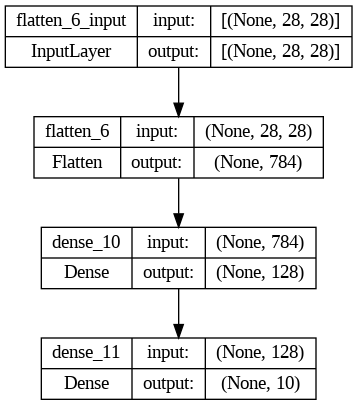

In [6]:
import tensorflow as tf
import numpy as np

(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

trainX = trainX / 255.0
testX = testX / 255.0

trainX = trainX.reshape( (trainX.shape[0], 28,28,1) )
testX = testX.reshape( (testX.shape[0], 28,28,1) )

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])


from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True) # 모델을 미리보기 가능





# model.fit(trainX, trainY, validation_data=(testX, testY), epochs=3)

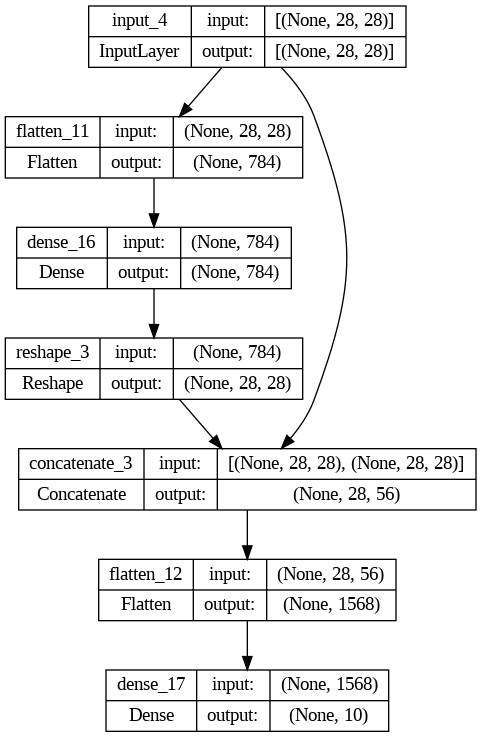

In [8]:

input1 = tf.keras.layers.Input(shape=[28,28])
flatten1 = tf.keras.layers.Flatten()(input1)
dense1 = tf.keras.layers.Dense(28*28, activation='relu')(flatten1)
# 이렇게 하면 레이어 순서를 조작할 수 있음.

reshape1 = tf.keras.layers.Reshape((28,28))(dense1)

concat1 = tf.keras.layers.Concatenate()([input1, reshape1]) # layer 2개를 합칠 수도 있음
flatten2 = tf.keras.layers.Flatten()(concat1)
output = tf.keras.layers.Dense(10, activation='softmax')(flatten2)

model = tf.keras.Model(input1, output)# 인풋, 아웃풋 레이어 넣으면 model 만들 수 있음


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True) # 모델을 미리보기 가능

